# 🎆 Convolutions

In this notebook, we'll walk through how convolutional filters can pick out different aspects of an image

In [62]:
%matplotlib inline  
#魔法命令，无需plt.show()即可输出图形
import matplotlib.pyplot as plt
import numpy as np
#from skimage import data
#from skimage.color import rgb2gray
#from skimage.transform import resize
import skimage

#### skimage是scikit-image的缩写。
#### skimage.data含有一些常用的图像。这些图像以jpg、png存储，以(0~1)形式提取.

astronaut()：一个代表宇航员的彩色图像。
camera()：一个代表相机捕捉的灰度图像。
checkerboard()：一个黑白方格棋盘图像。
chelsea()：一个代表一只猫的彩色图像。
clock()：一个代表时钟的彩色图像。
coffee()：一个代表咖啡杯的彩色图像。
coins()：一个代表硬币的灰度图像。
horse()：一个代表马的黑白图像。
hubble_deep_field()：一个代表哈勃深场图像的彩色图像。
immunohistochemistry()：一个代表免疫组织化学的彩色图像


## 0. Original Input Image <a name="orig"></a>

(400, 600, 3)


(400, 600)

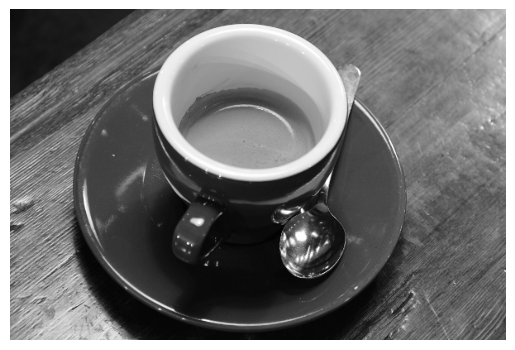

In [63]:
#im=skimage.data.astronaut()
im=skimage.data.coffee()
print(im.shape) #(400, 600, 3)
im = skimage.color.rgb2gray(im)  #  0~1
#im = skimage.transform.resize(im, (64, 64))
plt.axis("off")
plt.imshow(im, cmap="gray")
im.shape #(400, 600)

## Horizontal Edge Filter <a name="hor"></a>

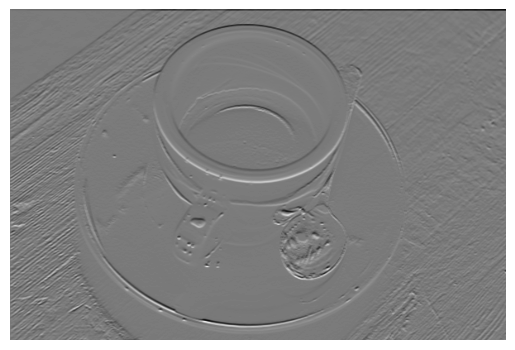

In [64]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

new_image = np.zeros(im.shape)  #填充 0 到shape(600,400)区域

im_pad = np.pad(im, 1, "constant")  #shape=(402, 602) 图像外增加1圈 0 

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="gray")

## Vertical Edge Filter <a name="ver"></a>

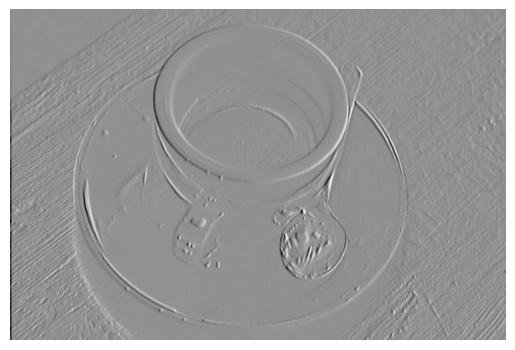

In [65]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Horizontal Edge Filter with Stride 2 <a name="hor2"></a>

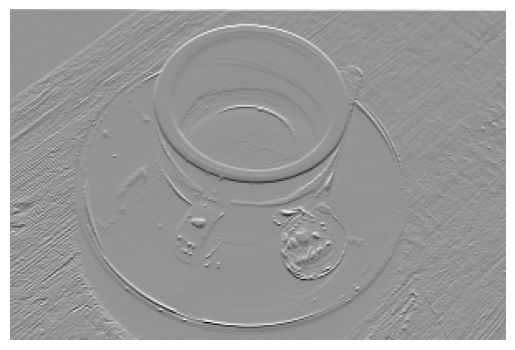

In [66]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Vertical Edge Filter with Stride 2 <a name="ver2"></a>

(200, 300)


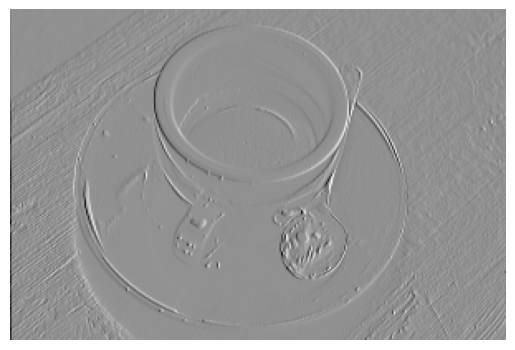

In [67]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")
print(new_image.shape)

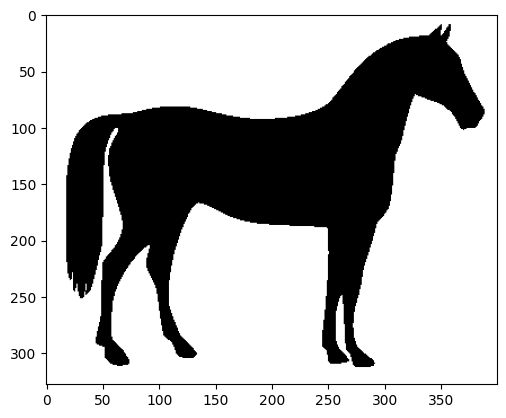

In [71]:
im=skimage.data.horse()
plt.imshow(im,cmap='gray')